In [ ]:
# 1. Import Libraries
# We import the necessary Python libraries:
# - pandas for handling data
# - matplotlib and seaborn for visualizations
# - %matplotlib inline ensures plots are displayed within the notebook


SyntaxError: invalid syntax (2388343898.py, line 2)

In [3]:
# Import necessary libraries
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For charts
import seaborn as sns  # For better visualizations

# Allow charts to display inside the notebook
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [ ]:
# 2. Load Data
# We load CSV files into Pandas DataFrames. These files contain user interactions with different pages of the sales funnel.


In [2]:
# Define file paths
files = {
    "Home Page": "home_page_table.csv",
    "Search Page": "search_page_table.csv",
    "Payment Page": "payment_page_table.csv",
    "Payment Confirmation": "payment_confirmation_table.csv",
    "User Data": "user_table.csv"
}

# Load CSV files into DataFrames
home_df = pd.read_csv(files["Home Page"])
search_df = pd.read_csv(files["Search Page"])
payment_df = pd.read_csv(files["Payment Page"])
confirmation_df = pd.read_csv(files["Payment Confirmation"])
users_df = pd.read_csv(files["User Data"])

# Display dataset structure
print("Dataset Information:")
for name, df in zip(files.keys(), [home_df, search_df, payment_df, confirmation_df, users_df]):
    print(f"\n{name} Data:")
    display(df.head())  # Show the first few rows
    df.info()  # Show column info

Dataset Information:

Home Page Data:


,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   page     90400 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB

Search Page Data:


,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  45200 non-null  int64 
 1   page     45200 non-null  object
dtypes: int64(1), object(1)
memory usage: 706.4+ KB

Payment Page Data:


,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6030 non-null   int64 
 1   page     6030 non-null   object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB

Payment Confirmation Data:


,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  452 non-null    int64 
 1   page     452 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.2+ KB

User Data Data:


,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
# 3. Check for Missing Values
# Before analysis, we check for missing values to ensure data integrity.


In [3]:
# Check for missing values in all datasets
print("\nMissing Values in Each Dataset:")
for name, df in zip(files.keys(), [home_df, search_df, payment_df, confirmation_df, users_df]):
    print(f"\n{name} Data:")
    print(df.isnull().sum())


Missing Values in Each Dataset:

Home Page Data:
user_id    0
page       0
dtype: int64

Search Page Data:
user_id    0
page       0
dtype: int64

Payment Page Data:
user_id    0
page       0
dtype: int64

Payment Confirmation Data:
user_id    0
page       0
dtype: int64

User Data Data:
user_id    0
date       0
device     0
sex        0
dtype: int64


In [ ]:
# 4. Merge DataFrames
# We merge all datasets on `user_id` to create a unified DataFrame that tracks user interactions across different stages.


In [4]:
# Merge datasets on 'user_id' with appropriate suffixes to avoid duplicate column names
merged_df = users_df \
    .merge(home_df, on="user_id", how="left", suffixes=("_user", "_home")) \
    .merge(search_df, on="user_id", how="left", suffixes=("", "_search")) \
    .merge(payment_df, on="user_id", how="left", suffixes=("", "_payment")) \
    .merge(confirmation_df, on="user_id", how="left", suffixes=("", "_confirmation"))

# Display first few rows of the merged dataset
print("\nMerged Dataset:")
display(merged_df.head())


Merged Dataset:


,user_id,date,device,sex,page,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [ ]:
# 5. Calculate Funnel Drop-Off
# We count unique users at each stage and calculate the drop-off rate.


In [5]:
# Count unique users at each stage of the sales funnel
funnel_counts = {
    "Home Page": merged_df["user_id"].nunique(),
    "Search Page": merged_df[merged_df["page_search"].notna()]["user_id"].nunique(),
    "Payment Page": merged_df[merged_df["page_payment"].notna()]["user_id"].nunique(),
    "Confirmation Page": merged_df[merged_df["page_confirmation"].notna()]["user_id"].nunique()
}

# Convert dictionary to DataFrame
funnel_df = pd.DataFrame.from_dict(funnel_counts, orient='index', columns=['Users'])

# Calculate drop-off rates
funnel_df["Drop-off Rate (%)"] = funnel_df["Users"].pct_change().abs() * 100

# Display funnel data
print("\nSales Funnel Data:")
display(funnel_df)


Sales Funnel Data:


,Users,Drop-off Rate (%)
Home Page,90400,NaN
Search Page,45200,50.000000
Payment Page,6030,86.659292
Confirmation Page,452,92.504146


In [ ]:
# 6. Visualize Funnel Drop-Off
# We create a horizontal bar chart to show user drop-off at each stage.


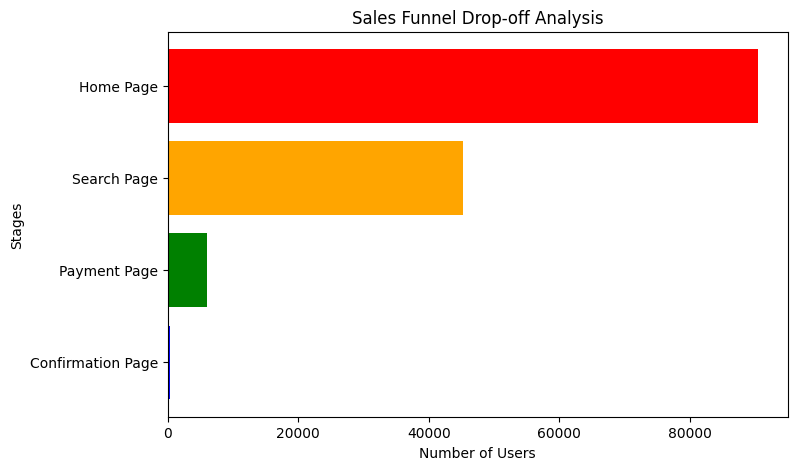

In [6]:
# Reverse order for better visualization
stages = funnel_df.index[::-1]
values = funnel_df["Users"][::-1]

# Create a horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(stages, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Number of Users")
plt.ylabel("Stages")
plt.title("Sales Funnel Drop-off Analysis")

# Display the plot
plt.show()